In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

import py3Dmol

import scipy.spatial.transform as Rotation


import numpy as np

import os


In [3]:
mol2_train = [x for x in os.listdir("/data/unibas/boittier/hydra/train") if x.__contains__("molecule")]
mol2_train

['h2o.out.molecule.mol2',
 '327-54-8.out.molecule.mol2',
 '611-20-1.out.molecule.mol2',
 '62-53-3.out.molecule.mol2',
 '67-64-1.out.molecule.mol2',
 '98-86-2.out.molecule.mol2',
 '1191-95-3.out.molecule.mol2',
 '98-85-1.out.molecule.mol2',
 '132-64-9.out.molecule.mol2',
 '2406-25-9.out.molecule.mol2',
 '288-32-4.out.molecule.mol2']

In [194]:
m = Chem.MolFromMol2File(os.path.join("train", mol2_train[1]), removeHs=False)
m_noHs = Chem.MolFromMol2File(os.path.join("train", mol2_train[1]))

m_fp = Chem.RDKFingerprint(m_noHs)
m
Chem.MolToSmiles(m)


'[H]c1c(F)c(F)c([H])c(F)c1F'

In [15]:
GDB11_range = (9, 9)
smiles_ = []
for i in range(GDB11_range[0], GDB11_range[1]+1):
    if i < 10:
        i = f"0{i}"
    else:
        pass
    smiles_.extend(open(f"/home/boittier/Desktop/gdb11_size{i}.smi").readlines())

In [26]:
suppl = Chem.SmilesMolSupplier(f"/home/boittier/Desktop/gdb11_size{i}.1.smi")

In [195]:
matches = []
for i, mol in enumerate(suppl):
    mol_fp = Chem.RDKFingerprint(mol)
    
    # calculate similarity
    sim = DataStructs.FingerprintSimilarity(mol_fp, m_fp)
    
    if 1 > sim > 0.35:
        
        m_Hs = Chem.AddHs(mol)
        AllChem.EmbedMolecule(m_Hs,randomSeed=0xf00d)
        mol = m_Hs
        
        smi = Chem.MolToSmiles(mol)
        print(i, smi, sim)
        matches.append((smi, mol))

19771 [H]Oc1c([H])c(F)c([H])c(F)c1[H] 0.4122137404580153
20045 [H]c1c(F)c([H])c(C([H])([H])[H])c([H])c1F 0.39552238805970147
20048 [H]c1c(F)c([H])c(N([H])[H])c([H])c1F 0.41353383458646614
20049 [H]c1c(F)c([H])c(F)c([H])c1F 0.6707317073170732
167436 [H]Oc1c([H])c([H])c(F)c([H])c1F 0.3624161073825503
168329 [H]Oc1c([H])c([H])c(F)c(F)c1[H] 0.4014084507042254
168898 [H]c1c([H])c(C([H])([H])[H])c(F)c([H])c1F 0.3767123287671233
168902 [H]c1c([H])c(N([H])[H])c(F)c([H])c1F 0.3691275167785235
168904 [H]c1c([H])c(C([H])([H])[H])c([H])c(F)c1F 0.3904109589041096
168905 [H]c1c([H])c(N([H])[H])c([H])c(F)c1F 0.4
240052 [H]Oc1c([H])c([H])c([H])c(F)c1F 0.36075949367088606
240240 [H]Oc1c(F)c([H])c([H])c([H])c1F 0.3829787234042553
241038 [H]c1c([H])c(F)c(C([H])([H])[H])c(F)c1[H] 0.39568345323741005
241048 [H]c1c([H])c(F)c(N([H])[H])c(F)c1[H] 0.3900709219858156
241055 [H]c1c([H])c(F)c(F)c(C([H])([H])[H])c1[H] 0.3670886075949367
241057 [H]c1c([H])c(F)c(F)c(N([H])[H])c1[H] 0.36024844720496896
241058 [H]c1c(

In [421]:
def mol_to_xyz_np(mol):
    lines = Chem.MolToMolBlock(mol).splitlines()
    lines = [x for x in lines if len(x.split()) > 11]
    xyz = [[float(x.split()[0]), float(x.split()[1]), float(x.split()[2])] for x in lines]
    atoms = [str(x.split()[3]) for x in lines if len(x.split()) > 5]
    
    return np.array(xyz), atoms
    
    
def keep_indices(xyz, indices):
    output = np.zeros((len(indices), 3))
    for i, index in enumerate(indices):
        output[i][0] = xyz[index][0]
        output[i][1] = xyz[index][1]
        output[i][2] = xyz[index][2]
        
    return output

mol_to_xyz_np(m)


(array([[-8.0230e-01,  6.0240e-01,  2.0000e-04],
        [-5.3030e-01, -7.5350e-01,  3.0000e-04],
        [ 7.9220e-01, -1.1595e+00,  2.0000e-04],
        [ 1.8209e+00, -2.2640e-01, -1.0000e-04],
        [ 1.5433e+00,  1.1290e+00, -2.0000e-04],
        [ 2.2170e-01,  1.5379e+00, -0.0000e+00],
        [-1.3359e+00, -1.4736e+00,  6.0000e-04],
        [ 2.3431e+00,  1.8538e+00, -5.0000e-04],
        [ 3.0944e+00, -6.4600e-01, -3.0000e-04],
        [ 1.0904e+00, -2.4664e+00,  3.0000e-04],
        [-2.0803e+00,  1.0340e+00,  5.0000e-04],
        [-7.4600e-02,  2.8463e+00, -1.0000e-04]]),
 ['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'F', 'F'])

In [288]:
test_match_1 = matches[0][1]
test_match_2 = matches[1][1]
test_match_3 = matches[2][1]

mcs_mols = [m, test_match_1, test_match_2, test_match_3]


res=rdFMCS.FindMCS(mcs_mols, bondCompare=rdFMCS.BondCompare.CompareOrderExact, ringMatchesRingOnly=True)
smarts = res.smartsString
smarts_mol = Chem.MolFromSmarts(smarts)

indices_match1 = m.GetSubstructMatches(smarts_mol)
indices_match2 = test_match_1.GetSubstructMatches(smarts_mol)


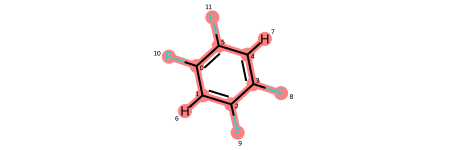

In [422]:
m1_xyz, m1_atoms = mol_to_xyz_np(m)
m


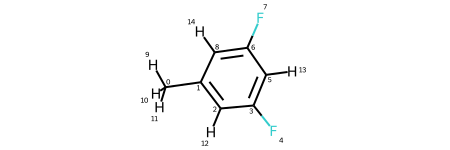

In [423]:
m2_xyz, m2_atoms = mol_to_xyz_np(test_match_2)
test_match_2


In [424]:
indices_match1[0]

(6, 1, 2, 9, 3, 4, 5, 0, 10)

In [425]:
indices_match2[0]

(11, 5, 3, 4, 2, 1, 8, 6, 7)

In [408]:
align_1 = keep_indices(m1_xyz, indices_match1[0])
align_2 = keep_indices(m2_xyz, indices_match2[0])

In [409]:
a_align_1 = np.take(m1_atoms, indices_match1[0], axis=0)
a_align_2 = np.take(m2_atoms, indices_match2[0], axis=0)
indices_match1[0]





keep_indices(m1_xyz, indices_match1[0])


array([[-1.3359e+00, -1.4736e+00,  6.0000e-04],
       [-5.3030e-01, -7.5350e-01,  3.0000e-04],
       [ 7.9220e-01, -1.1595e+00,  2.0000e-04],
       [ 1.0904e+00, -2.4664e+00,  3.0000e-04],
       [ 1.8209e+00, -2.2640e-01, -1.0000e-04],
       [ 1.5433e+00,  1.1290e+00, -2.0000e-04],
       [ 2.2170e-01,  1.5379e+00, -0.0000e+00],
       [-8.0230e-01,  6.0240e-01,  2.0000e-04],
       [-2.0803e+00,  1.0340e+00,  5.0000e-04]])

In [410]:
com1 = np.mean(m1_xyz.T, axis=1)
com1

array([5.06883333e-01, 1.89833333e-01, 7.50000000e-05])

In [411]:
com2 = np.mean(m2_xyz.T, axis=1)
com2

array([-1.33333333e-05,  6.66666667e-06, -6.66666667e-06])

In [416]:
trans = com1 - com2

rotation, rmsd = Rotation.Rotation.align_vectors(align_1, align_2+trans)


In [417]:
rotated = rotation.apply(m2_xyz+trans)

In [418]:
def np_to_xyz(np_array, atoms):
    s = f"{len(atoms)} \n \n"
    fs = "{} {} {} {}"
    for xyz, a in zip(np_array, atoms):
        s += f"{a} {xyz[0]} {xyz[1]} {xyz[2]}\n"
    return s

xyz_start_str = np_to_xyz(m1_xyz, m1_atoms)
xyz_final_str = np_to_xyz(rotated, m2_atoms)


In [419]:
xyzview = py3Dmol.view(width=400,height=400)
xyzview.addModel(xyz_final_str, "xyz")
xyzview.addModel(xyz_start_str, "xyz")
xyzview.setStyle({'stick':{}})
xyzview.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [231]:
mols = [y for x, y in matches]

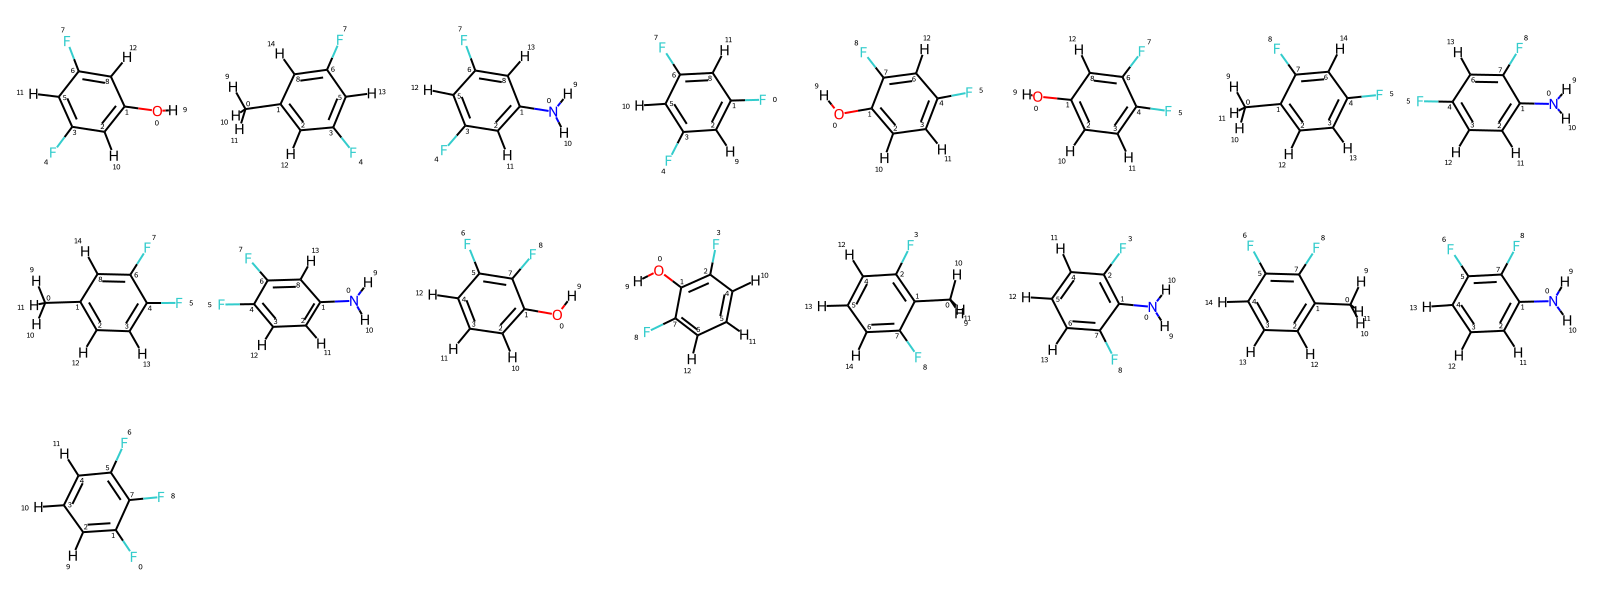

In [235]:
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols,molsPerRow=8,subImgSize=(200,200))    
img